In [3]:
# 导库
from sklearn.datasets import make_classification
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
from tensorflow.keras.layers import Dense

# 使用GPU 6
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[6], 'GPU')
        for gpu in gpus:
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]  # 限制每个GPU使用4GB显存
            )
    except RuntimeError as e:
        print(e)

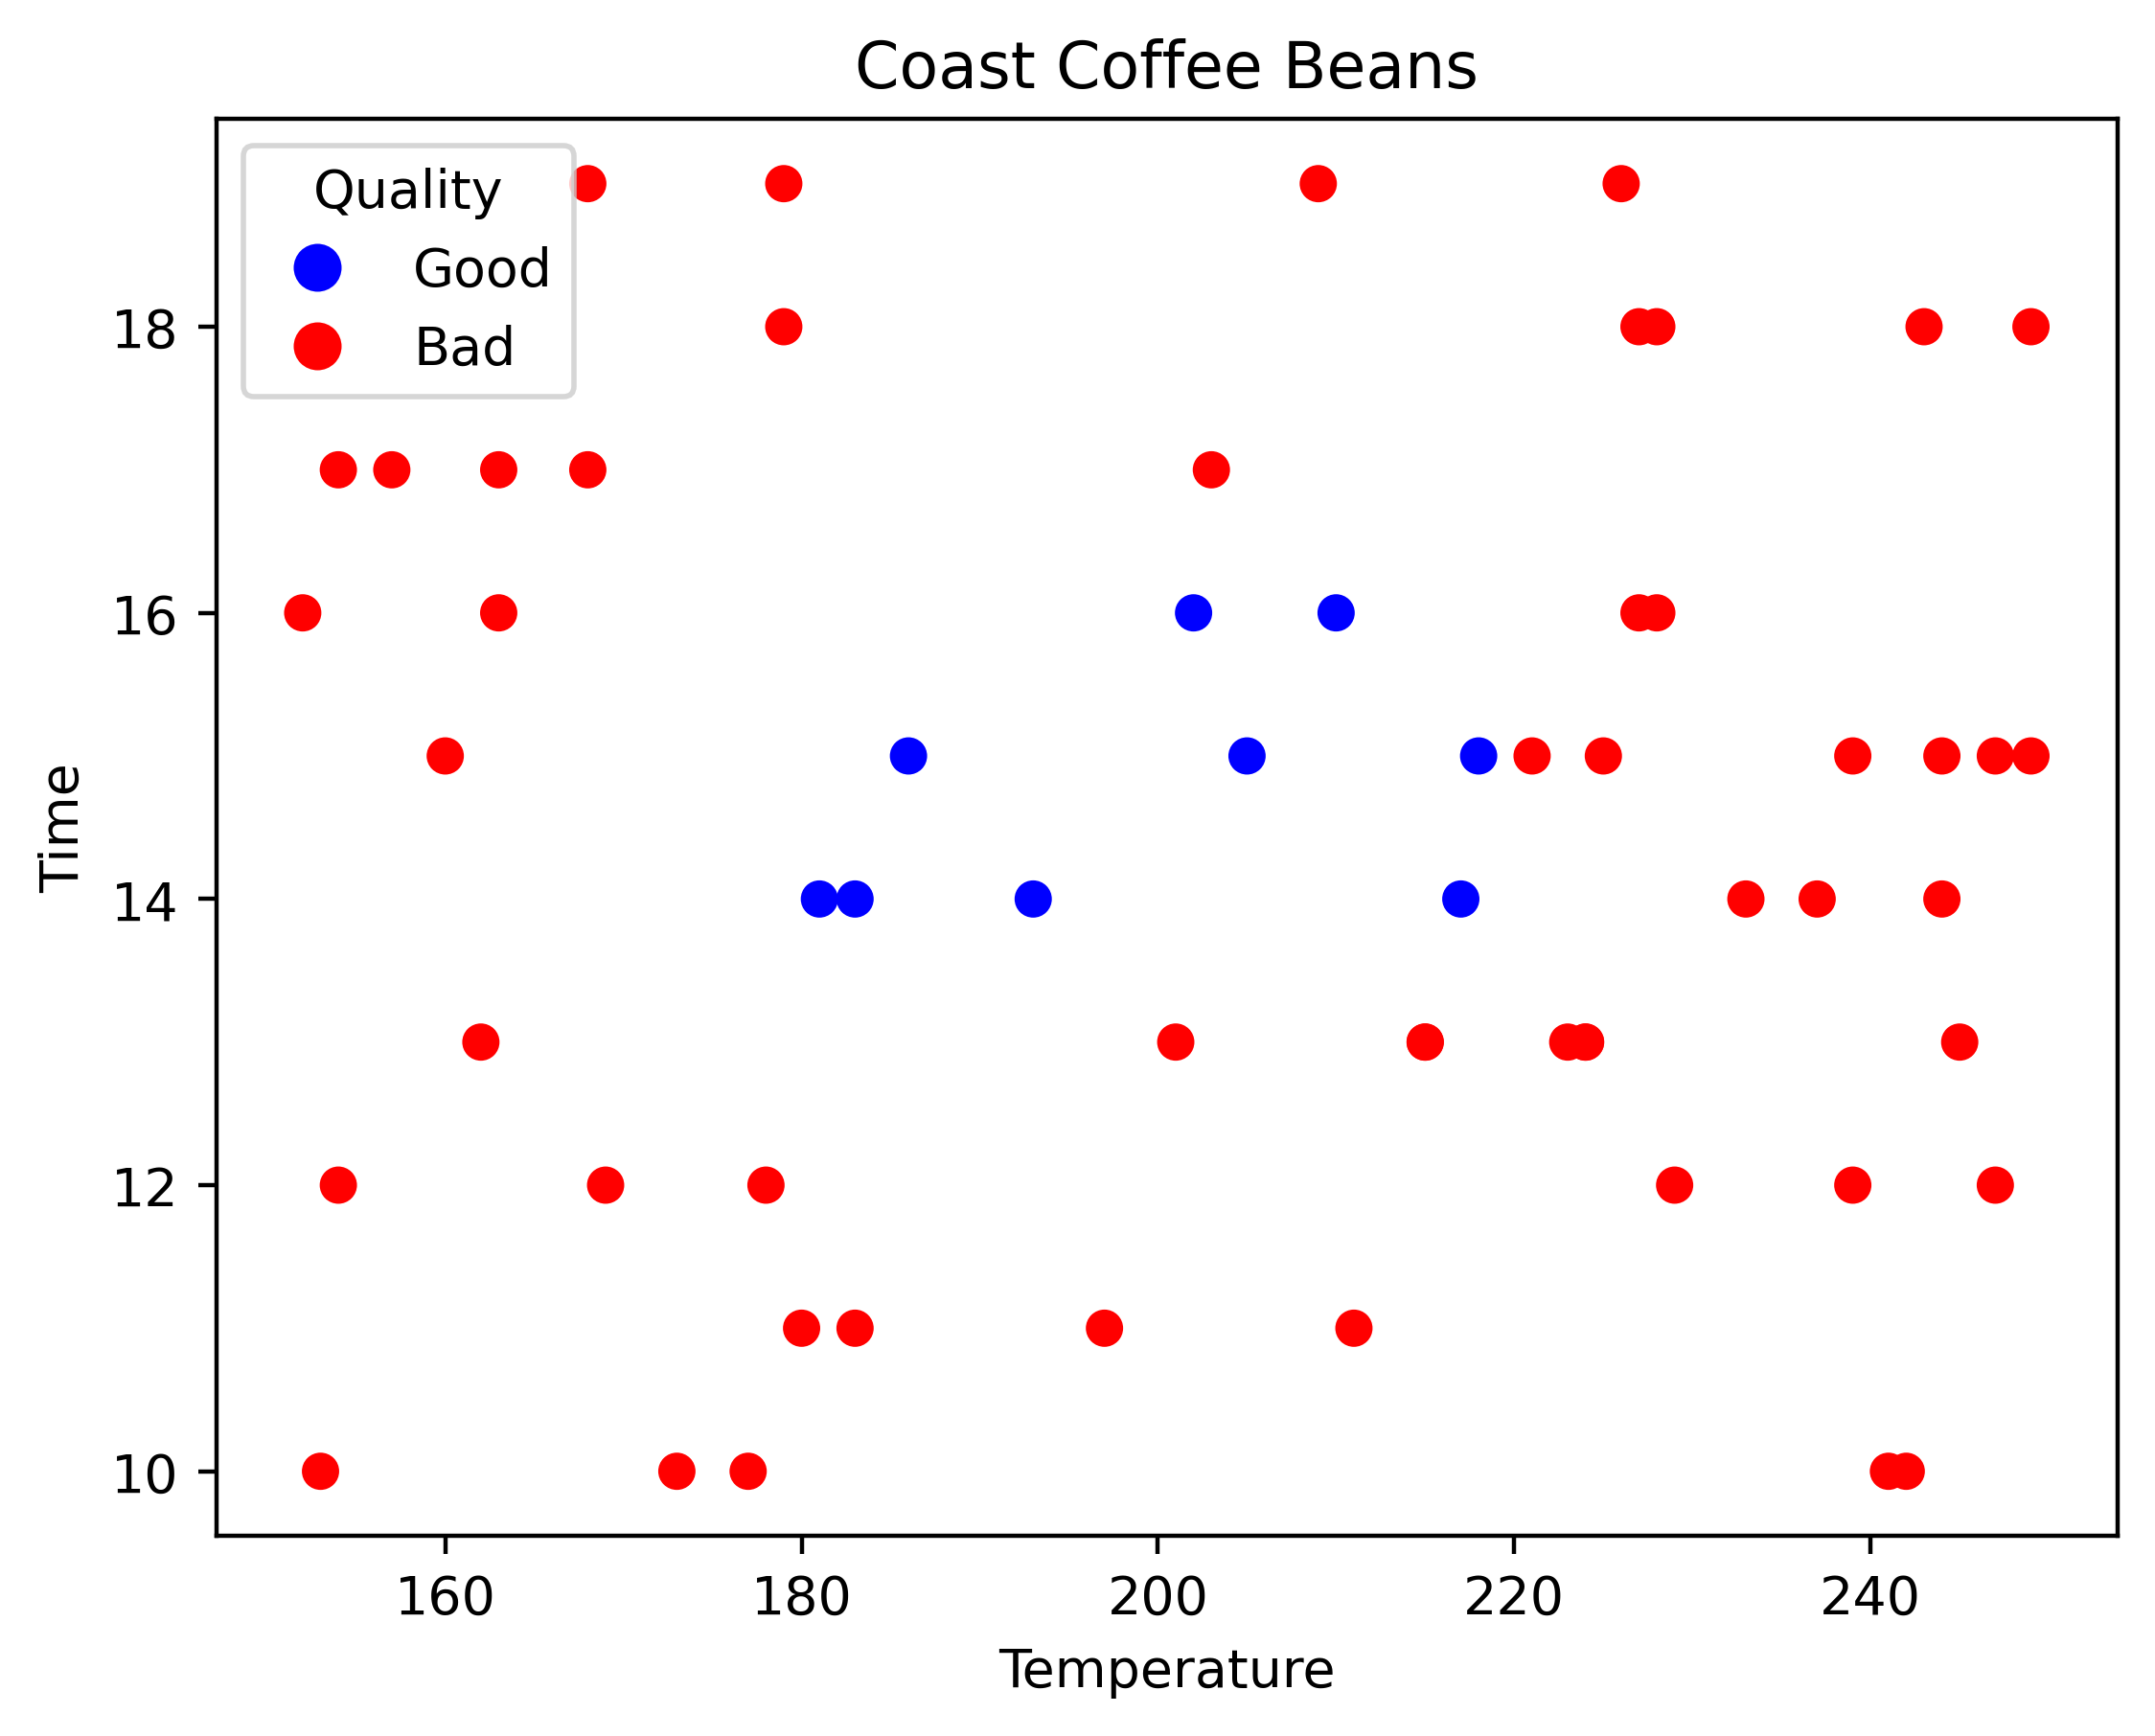

In [4]:
# 生成烤咖啡豆的数据集
# 温度和时间作为特征，结果为好坏
# X[:, 0] 表示温度，X[:, 1] 表示时间，y 表示结果（好坏）
def generate_data():
    # 生成符合条件的数据集，温度在150到200度之间，时间在10到20分钟之间
    np.random.seed(38)
    X = np.zeros((60, 2),dtype=int)
    y = np.zeros(60, dtype=int)
    X[:, 0] = np.random.randint(150, 250, size=60)
    X[:, 1] = np.random.randint(10, 20, size=60)
    
    # 将中间的点标记为好，周围的点标记为坏
    # 调整条件以确保至少5个点被标记为好
    for i in range(60):
        if 180 < X[i, 0] < 220 and 13 < X[i, 1] < 17:
            y[i] = 1  # 好的部分在190到210度之间，时间在13到16分钟之间
    
    plt.figure(dpi=400)
    cmap = ListedColormap(['red', 'blue'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
    plt.title('Coast Coffee Beans')
    plt.xlabel('Temperature')
    plt.ylabel('Time')
    # 添加图例，表示颜色所代表的含义
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Good',
               markerfacecolor='blue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Bad',
               markerfacecolor='red', markersize=10)
    ]
    plt.legend(handles=legend_elements, title="Quality", loc='upper left')
    plt.show()
    return X, y

x, y = generate_data()

In [5]:


model = tf.keras.Sequential()
layer_1 = Dense(units=3,activation='sigmoid')
layer_2 = Dense(units=1,activation='sigmoid')
model.add(layer_1)
model.add(layer_2)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='binary_crossentropy')
model.fit(x,y,epochs=100)
a = model.predict(x)

# 计算并输出模型的精准度
from sklearn.metrics import accuracy_score

# 将预测结果转换为二进制标签
predicted_labels = (a > 0.5).astype(int)

# 计算精准度
accuracy = accuracy_score(y, predicted_labels)
print(f"模型的精准度: {accuracy:.2f}")




Epoch 1/100


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

2/2 [==============================] - 2s 10ms/step - loss: 0.7364
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 0.7210
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 0.7066
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6929
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6786
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6668
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6531
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6411
Epoch 9/100


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


2/2 [==============================] - 0s 7ms/step - loss: 0.6245
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6015
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 0.5786
Epoch 12/100
2/2 [==============================] - 0s 7ms/step - loss: 0.5240
Epoch 13/100
2/2 [==============================] - 0s 7ms/step - loss: 0.5058
Epoch 14/100
2/2 [==============================] - 0s 7ms/step - loss: 0.4971
Epoch 15/100
2/2 [==============================] - 0s 7ms/step - loss: 0.4868
Epoch 16/100
2/2 [==============================] - 0s 7ms/step - loss: 0.4798
Epoch 17/100
2/2 [==============================] - 0s 7ms/step - loss: 0.4722
Epoch 18/100
2/2 [==============================] - 0s 7ms/step - loss: 0.4654
Epoch 19/100
2/2 [==============================] - 0s 7ms/step - loss: 0.4600
Epoch 20/100
2/2 [==============================] - 0s 7ms/step - loss: 0.4560
Epoch 21/100
2/2 [==============================] - 0s 7ms/step -